In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sys

from tqdm.notebook import tqdm

from superrad import ultralight_boson as ub

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{amssymb}\let\Bbbk\relax\usepackage{siunitx}\DeclareSIUnit\year{yr}\usepackage{newtxtext}\usepackage{newtxmath}')

sys.path.append("python/")
from bhsr.bhsr import *
from bhsr.self_interactions import *
from bhsr.cfm import *
from bhsr.kerr_bh import *
from bhsr.stats import *

!mkdir -p figures

## BHSR Rates

Here, we illustrate how to compute the BHSR rates for the $|211\rangle$ level (cf. Fig. 1 in the paper).

In [2]:
# Initialise the SuperRad model and example parameters
bc0 = ub.UltralightBoson(spin=0, model="relativistic")
astar0 = 0.99
mbh0 = 10.0 # Msol

# Define the range of boson masses/alpha values to consider
mu_max = 7e-12
muvals = np.linspace(0, mu_max, 250)
alphvals = alpha(muvals, mbh0)
muvals_small = np.linspace(1e-13, mu_max, 100)
alphvals_small = alpha(muvals_small, mbh0)

# Compute the SR rates
roots = [find_cf_root(mbh0, astar0, mu, 2, 1, 1) for mu in tqdm(muvals)]
cfm_bhsr_rates = np.array([z.imag for z in roots])*rg(mbh0) # CFM SR rates
superrad_bhsr_rates = [GammaSR_nlm_superrad(mu, mbh0, astar0, m=1, bc=bc0)*rg(mbh0) for mu in muvals] # SuperRad SR rates
nr_bhsr_rates = GammaSR_nlm_nr(muvals, mbh0, astar0, 2, 1, 1)*rg(mbh0) # NR SR rates
hovals = [omega_nlm_bxzh(mu, mbh0, astar0, 2, 1, 1) for mu in muvals]
ho_bhsr_rates = np.array([z[-1]*rg(mbh0) for z in hovals]) # Higher-order SR rates

  0%|          | 0/250 [00:00<?, ?it/s]

/Users/sebhoof/Software/bhsr/python/bhsr/bhsr.py:282: RuntimeWarning: invalid value encountered in scalar divide
  delta1 = 0.5*(q/eps - eps - p*2j)*kappab_term*gam_terms


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMe

/Users/sebhoof/Software/bhsr/python/bhsr/bhsr.py:282: RuntimeWarning: invalid value encountered in scalar divide
  delta1 = 0.5*(q/eps - eps - p*2j)*kappab_term*gam_terms


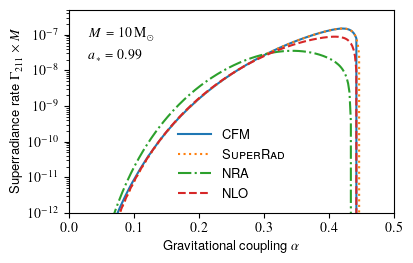

In [3]:
fig, ax = plt.subplots(figsize=(4, 2.5))

p3 = ax.plot(alphvals, cfm_bhsr_rates, ls='-', label=r"CFM")
p5 = ax.plot(alphvals, superrad_bhsr_rates, ls=':', label=r"\textsc{SuperRad}")
p1 = ax.plot(alphvals, nr_bhsr_rates, ls='-.', label=r"NRA")
p2 = ax.plot(alphvals, ho_bhsr_rates, ls='--', label=r"NLO")

ax.text(0.03, 0.8e-7, r"$M = 10\,\mathrm{M}_\odot$")
ax.text(0.03, 0.2e-7, r"$a_\ast = 0.99$")
ax.legend(frameon=False, handlelength=2.4, loc=8)
ax.set_xlabel(r"Gravitational coupling $\alpha$")
ax.set_ylabel(r"Superradiance rate $\Gamma_{211} \times M$")
ax.set_xlim([0, 0.5])
ax.set_ylim([1e-12, 0.5e-6])
ax.set_yscale('log')
fig.tight_layout(pad=0.25)

plt.show()

## BH data

Make a plots using the parameter samples for M33 X-7 (cf. Fig. 2 in the paper).

In [4]:
m33x7_m, m33x7_a = np.genfromtxt("data/samples/M33_X-7_samples.dat", unpack=True)
m33x7_data = np.column_stack((m33x7_m, m33x7_a))
m33x7_tbh = 3e6 # yr

# Summarise the posterior samples to draw Gaussian error ellipses
m33x7_m_mean, m33x7_a_mean = np.mean(m33x7_m), np.mean(m33x7_a)
m33x7_m_std, m33x7_a_std = np.std(m33x7_m), np.std(m33x7_a)
cov = np.cov((m33x7_m,m33x7_a))
l, c = np.linalg.eig(cov)
phi = np.linspace(0, 2*np.pi, 50)
m33x7_xp = np.array([2*c@np.diag(np.sqrt(l))@v for x in phi for v in [np.array([np.cos(x), np.sin(x)]).T]])

print(f"M33 X-7 | M = {m33x7_m_mean:.2f} +/- {m33x7_m_std:.2f} Msol, a* = {m33x7_a_mean:.2f} +/- {m33x7_a_std:.2f}")

# Some example masses for the plot
mu0 = 1.5e-13 # eV
m_bh_vals = np.arange(10, 25, 0.1) # Msol

a_vals_regge = compute_regge_slopes_given_rate(mu0, m_bh_vals, sr_function=GammaSR_nlm_bxzh, inv_tSR=1/m33x7_tbh)

M33 X-7 | M = 15.67 +/- 1.49 Msol, a* = 0.83 +/- 0.06


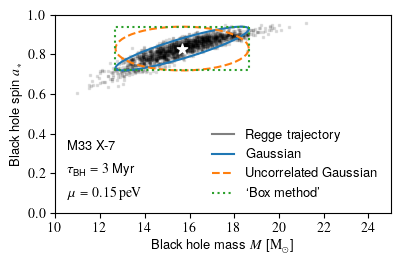

In [5]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax.fill_between(m_bh_vals, a_vals_regge, a_vals_regge+1, color='grey', alpha=0.1)
ax.scatter(m33x7_m, m33x7_a, s=1, marker='s', c='k', alpha=0.1, rasterized=True)
ax.scatter(m33x7_m_mean, m33x7_a_mean, s=60, fc='w', ec='w', marker='*')
ax.plot(m_bh_vals, a_vals_regge, c='grey', label=r"Regge trajectory")
ax.plot(m33x7_m_mean + m33x7_xp[:,0], m33x7_a_mean + m33x7_xp[:,1], ls='-', label=r"Gaussian")
ax.plot(m33x7_m_mean + 2*m33x7_m_std*np.cos(phi), m33x7_a_mean + 2*m33x7_a_std*np.sin(phi), ls='--', label=r"Uncorrelated Gaussian")
ax.plot(m33x7_m_mean + 2*m33x7_m_std*np.array([1,1,-1,-1,1]), m33x7_a_mean + 2*m33x7_a_std*np.array([1,-1,-1,1,1]), ls=':', label=r"`Box method'")
ax.text(10.5, 0.08, r"$\mu = \SI{{{:.2f}}}{{\pico\eV}}$".format(mu0/1e-12))
ax.text(10.5, 0.2, r"$\tau_\text{{BH}} = \num{{{:d}}}\,\text{{Myr}}$".format(int(m33x7_tbh/1e6)))
ax.text(10.5, 0.32, r"M33 X-7")

ax.set_ylim([0,1])
ax.set_xlim([10,25])
ax.set_xlabel(r"Black hole mass $M$ [$\mathrm{M}_\odot$]")
ax.set_ylabel(r"Black hole spin $a_\ast$")
ax.legend(frameon=False, handlelength=1.6, loc=4)
fig.tight_layout(pad=0.25)

plt.show()

## ULB Constraints

Compare our method to others for M33 X-7 and non-interacting ULBs (cf. Fig. 5 in the paper).

In [6]:
# Select bosonic levels |n,l,l> to consider and the appropriate mass range
states0 = [(ell+1, ell, ell) for ell in range(1,7)]
npoints0, nsamples0 = 101, 10000
muvals0 = np.logspace(-14, -10, npoints0)

# Obtain some random samples to similate an uncorrelated distribution
v1 = np.random.normal(loc=m33x7_m_mean, scale=m33x7_m_std, size=nsamples0)
v2 = np.random.normal(loc=m33x7_a_mean, scale=m33x7_a_std, size=nsamples0)
uncorr_data = np.column_stack((v1,v2))

p_m33x7_ours_211 = np.array([p_mc_int_no_f(mu, m33x7_data, states0[:1], tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals0)])
p_m33x7_ours_nlm = np.array([p_mc_int_no_f(mu, m33x7_data, states0, tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals0)])
pex_m33x7_uncorr = np.array([p_mc_int_no_f(mu, uncorr_data, states0[:1], tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals0)])
m33x7_summary = ['M33 X-7', 3e6, 15.56, 1.45, 0.84, 0.1, 0.1]
p_m33x7_masha = np.array([is_box_allowed_bosenova(mu, 1e-18, m33x7_summary, states=[(2,1,1)]) for mu in tqdm(muvals0)])

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

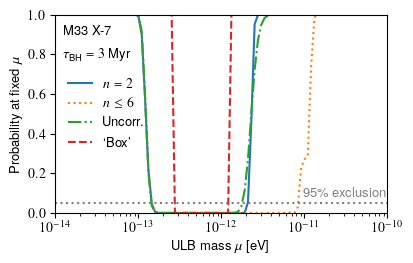

In [7]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax.plot(muvals0, p_m33x7_ours_211, ls='-', label=r"$n = 2$")
ax.plot(muvals0, p_m33x7_ours_nlm, ls=':', label=r"$n \leq 6$")
ax.plot(muvals0, pex_m33x7_uncorr, ls='-.', label=r"Uncorr.")
ax.plot(muvals0, 1 - p_m33x7_masha, ls='--', label=r"`Box'")
ax.plot([1e-14, 1e-9], 2*[0.05], ls=':', c='grey')
ax.text(0.95e-11, 0.075, r"95\% exclusion", c='grey', ha='left')
ax.text(1.25e-14, 0.78, r"$\tau_\text{{BH}} = \num{{{:d}}}\,\text{{Myr}}$".format(int(m33x7_tbh/1e6)))
ax.text(1.25e-14, 0.9, r"M33 X-7")

ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"Probability at fixed $\mu$")
ax.set_xscale('log')
ax.set_xlim([1e-14, 1e-10])
ax.set_ylim([0, 1])
ax.legend(frameon=False, loc=6, handlelength=1.7)
fig.tight_layout(pad=0.25)

plt.show()